In [1]:
%matplotlib inline


# Fitting an auto_arima model



This example demonstrates how we can use the ``auto_arima`` function to
select an optimal time series model. We'll be fitting our model on the lynx
dataset available in the `datasets` submodule.

.. raw:: html

   <br/>



Automatically created module for IPython interactive environment
Test RMSE: 1258.625


Text(0.5, 0, 'Year')

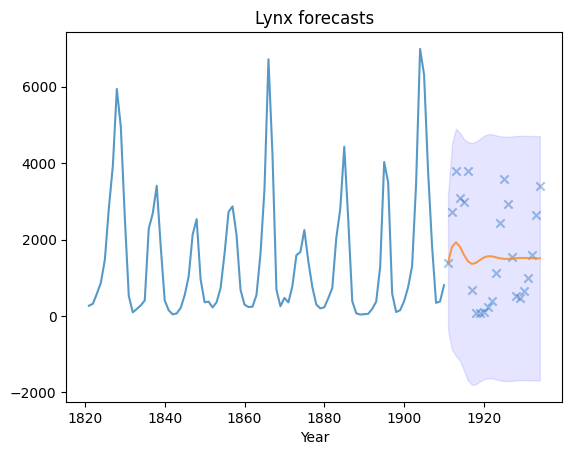

In [6]:
print(__doc__)

# Author: Taylor Smith <taylor.smith@alkaline-ml.com>

import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# #############################################################################
# Load the data and split it into separate pieces
data = pm.datasets.load_lynx()
train, test = model_selection.train_test_split(data, train_size=90)

# Fit a simple auto_arima model
modl = pm.auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                     stepwise=True, suppress_warnings=True, D=10, max_D=10,
                     error_action='ignore')

# Create predictions for the future, evaluate on test
preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)

# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

# #############################################################################
# Plot the points and the forecasts
x_axis = np.arange(train.shape[0] + preds.shape[0])
x_years = x_axis + 1821  # Year starts at 1821

plt.plot(x_years[x_axis[:train.shape[0]]], train, alpha=0.75)
plt.plot(x_years[x_axis[train.shape[0]:]], preds, alpha=0.75)  # Forecasts
plt.scatter(x_years[x_axis[train.shape[0]:]], test,
            alpha=0.4, marker='x')  # Test data
plt.fill_between(x_years[x_axis[-preds.shape[0]:]],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("Lynx forecasts")
plt.xlabel("Year")

In [7]:
plt.show()